# ***Multi-Lingual Support Data***

In [20]:
# https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets
import pandas as pd
df = pd.read_csv("dataset-tickets-multi-lang3-4k.csv")
df_en = df.loc[df["language"].eq("en"), :]
df=df_en
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
5,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
7,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
8,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
10,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN


In [22]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'tag_1', 'tag_2', etc. with the actual column names
tag_columns = [col for col in df.columns if 'tag' in col.lower()]

# Combine all tag columns into a single Series
all_tags = pd.concat([df[col] for col in tag_columns])

# Get the unique values
unique_tags = all_tags.unique()

unique_tags, len(unique_tags)

(array(['IT Support', 'Technical Support', 'Service Outage',
        'Network Issue', 'Billing Issue', 'Urgent Issue', 'Software Bug',
        'Product Support', 'Sales Inquiry', 'Returns and Exchanges',
        'Order Issue', 'Warranty Claim', 'Login Issue', 'Refund Request',
        'Account Assistance', 'Technical Guidance', 'Service Disruption',
        'Customer Service', 'General Inquiry', 'Payment Processing',
        'Service Maintenance', 'Hardware Failure', 'Human Resources',
        'Feature Request', 'Incident Report', 'Data Breach',
        'Account Security', 'Password Reset', 'Performance Tuning',
        'Customer Feedback', 'Product Replacement', 'System Maintenance',
        'Consulting Services', 'Shipment Delay', 'Problem Resolution',
        'Routine Request', 'System Crash', 'Shipping Inquiry', 'Security',
        'Shipping Delay', 'Cloud Infrastructure', 'Payroll Issue',
        'Cloud Services', 'Service Recovery', 'Service Notification',
        'Printer Issue'

In [23]:
print(df['type'].unique())
print(df['language'].unique())
print(df['business_type'].unique())
print(df['priority'].unique())
print(df['queue'].unique())
df.shape

['Request' 'Incident' 'Change' 'Problem']
['en']
['IT Services' 'Tech Online Store' 'IT Consulting Firm'
 'Software Development Company' 'Online Store' 'Adobe Photoshop 2024'
 'IT Consulting Service' 'Pit Services']
['high' 'medium' 'low']
['IT Support' 'Technical Support' 'Service Outages and Maintenance'
 'Product Support' 'Billing and Payments' 'Customer Service'
 'Returns and Exchanges' 'Sales and Pre-Sales' 'General Inquiry'
 'Human Resources']


(1391, 17)

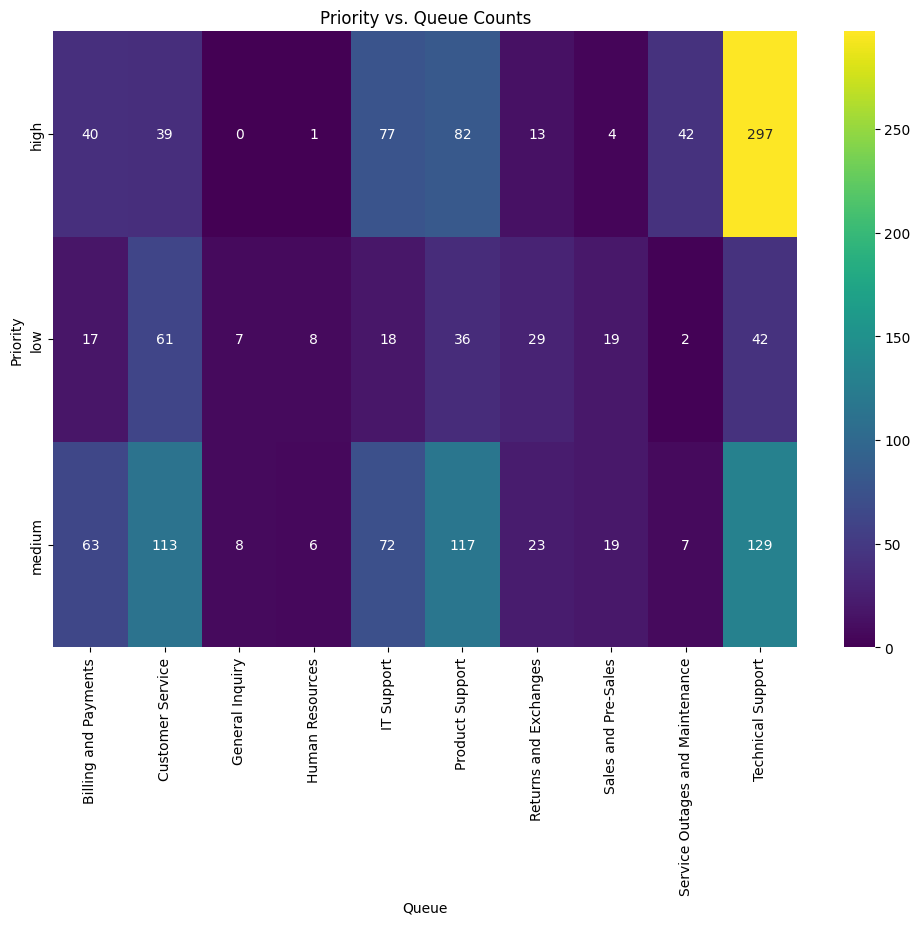

In [24]:
# prompt: Analyse priority and queue and provide heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and is already loaded
# ... (your existing code to load the dataframe)

# Analyze priority and queue using a heatmap
priority_queue_counts = df.groupby(['priority', 'queue']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(priority_queue_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Priority vs. Queue Counts')
plt.xlabel('Queue')
plt.ylabel('Priority')
plt.show()

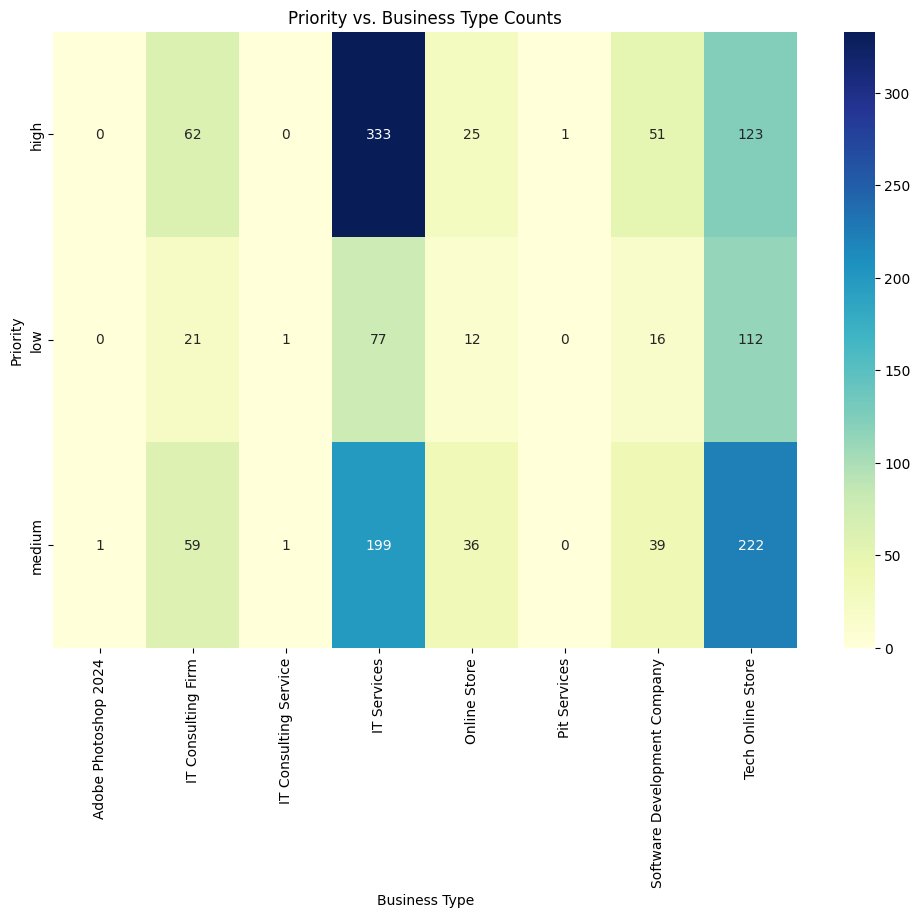

In [25]:
# prompt: Analyse priority and business type and provide heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and is already loaded
# ... (your existing code to load the dataframe)

# Analyze priority and business type using a heatmap
priority_business_counts = df.groupby(['priority', 'business_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(priority_business_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Priority vs. Business Type Counts')
plt.xlabel('Business Type')
plt.ylabel('Priority')
plt.show()

In [26]:
# prompt: Check for missing values count in columns like subject, body, and answer.

# Check for missing values in 'subject', 'body', and 'answer' columns
missing_values_count = df[['subject', 'body', 'answer']].isnull().sum()
missing_values_count

,0
subject,171
body,1
answer,0


In [27]:
## Key Insights
### 1) Values of subject, body, answer columns are all unique
### 2) High Priority to technical support queue - 297
### 3) high Priority to IT Services Business Type - 333
### 4) Maximum Request in Customer Services queue - 113